<a href="https://colab.research.google.com/github/PATELOM925/AI_LAB/blob/main/endsem_q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
train_datagenerator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2)
train = train_datagenerator.flow_from_directory('/content/Dataset1', batch_size=32, target_size=(64, 64), class_mode='categorical')

IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 7

Found 12 images belonging to 4 classes.


In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train,
    steps_per_epoch=len(train),
    epochs=EPOCHS,
)


Epoch 1/7
1/1 [==============================] - 2s 2s/step - loss: 1.3930 - accuracy: 0.0000e+00
Epoch 2/7
1/1 [==============================] - 0s 140ms/step - loss: 1.2749 - accuracy: 0.3333
Epoch 3/7
1/1 [==============================] - 0s 127ms/step - loss: 1.1444 - accuracy: 0.3333
Epoch 4/7
1/1 [==============================] - 0s 128ms/step - loss: 1.0772 - accuracy: 0.3333
Epoch 5/7
1/1 [==============================] - 0s 136ms/step - loss: 1.0439 - accuracy: 0.3333
Epoch 6/7
1/1 [==============================] - 0s 127ms/step - loss: 1.0157 - accuracy: 0.5833
Epoch 7/7
1/1 [==============================] - 0s 119ms/step - loss: 0.9671 - accuracy: 0.3333


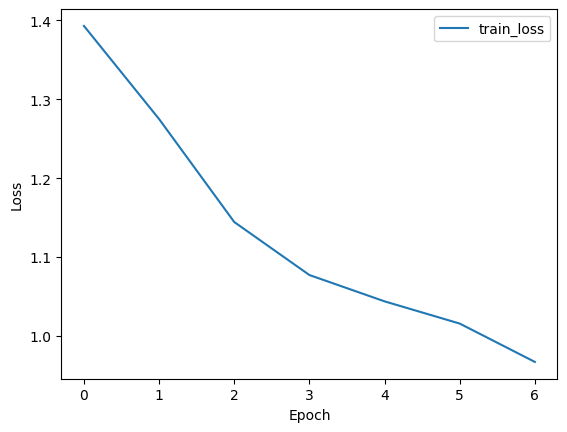

In [20]:
plt.plot(history.history['loss'], label='train_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [23]:

predictions = model.predict(train, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = train.classes

1/1 [==============================] - 0s 82ms/step
[1 1 1 1 1]


In [29]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4 0 0]
 [4 0 0]
 [4 0 0]]


In [28]:

class_labels = list(train.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels, labels=range(len(class_labels))))


Classification Report:
                             precision    recall  f1-score   support

         .ipynb_checkpoints       0.00      0.00      0.00         0
Corn_(maize)___Common_rust_       0.33      1.00      0.50         4
      Potato___Early_blight       0.00      0.00      0.00         4
                     tomato       0.00      0.00      0.00         4

                  micro avg       0.33      0.33      0.33        12
                  macro avg       0.08      0.25      0.12        12
               weighted avg       0.11      0.33      0.17        12



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.